# Clustering of Commercial sites

Create clusters of distinct commercial centers or markets using points of interest data of a city. Find and label the most significant clusters, statistically and intuitively.

## Load Data to GeoPandas Dataframe

GeoPandas is an open source project to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely.

In [1]:
import geopandas as gpd

gdf = gpd.read_file('NewDelhi.geojson')
gdf

,id,@id,amenity,name,atm,created_by,brand,brand:wikidata,brand:wikipedia,cuisine,...,drink:shake,seats,healthcare,addr:district,addr:subdistrict,addr:full,addr:state,contact:mobile,operator:type,geometry
0,node/248852574,node/248852574,cafe,Cafe Coffee Day,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.15189 28.53349)
1,node/248852583,node/248852583,bank,"ICICI, SBI, Citibank,",yes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.15200 28.53365)
2,node/266442982,node/266442982,cinema,PVR Priya,None,Potlatch 0.9a,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.16449 28.55731)
3,node/266443204,node/266443204,bank,Standard Chartered Bank,yes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.16455 28.55785)
4,node/266443228,node/266443228,fast_food,McDonald's,None,None,McDonald's,Q38076,en:McDonald's,burger,...,None,None,None,None,None,None,None,None,None,POINT (77.16376 28.55733)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,node/6908305667,node/6908305667,drinking_water,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.18404 28.57045)
969,node/6918479553,node/6918479553,fountain,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.21682 28.59044)
970,node/6918479554,node/6918479554,fountain,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.21676 28.59068)
971,node/6918479556,node/6918479556,fountain,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (77.21688 28.59023)


In [2]:
gdf.columns

Index(['id', '@id', 'amenity', 'name', 'atm', 'created_by', 'brand',
       'brand:wikidata', 'brand:wikipedia', 'cuisine',
       ...
       'drink:shake', 'seats', 'healthcare', 'addr:district',
       'addr:subdistrict', 'addr:full', 'addr:state', 'contact:mobile',
       'operator:type', 'geometry'],
      dtype='object', length=138)

We only require the Longitude and Latitude of the point along with its amenity type, the rest columns are not relevent to our analysis.

In [3]:
gdf = gdf[['id','amenity', 'geometry']]
gdf

,id,amenity,geometry
0,node/248852574,cafe,POINT (77.15189 28.53349)
1,node/248852583,bank,POINT (77.15200 28.53365)
2,node/266442982,cinema,POINT (77.16449 28.55731)
3,node/266443204,bank,POINT (77.16455 28.55785)
4,node/266443228,fast_food,POINT (77.16376 28.55733)
...,...,...,...
968,node/6908305667,drinking_water,POINT (77.18404 28.57045)
969,node/6918479553,fountain,POINT (77.21682 28.59044)
970,node/6918479554,fountain,POINT (77.21676 28.59068)
971,node/6918479556,fountain,POINT (77.21688 28.59023)


## Data Cleaning

Remove rows with empty data if present

In [4]:
gdf.dropna(inplace=True)
gdf

/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,amenity,geometry
0,node/248852574,cafe,POINT (77.15189 28.53349)
1,node/248852583,bank,POINT (77.15200 28.53365)
2,node/266442982,cinema,POINT (77.16449 28.55731)
3,node/266443204,bank,POINT (77.16455 28.55785)
4,node/266443228,fast_food,POINT (77.16376 28.55733)
...,...,...,...
968,node/6908305667,drinking_water,POINT (77.18404 28.57045)
969,node/6918479553,fountain,POINT (77.21682 28.59044)
970,node/6918479554,fountain,POINT (77.21676 28.59068)
971,node/6918479556,fountain,POINT (77.21688 28.59023)


## Visualizing with Folium

Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via folium.

The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both Image, Video, GeoJSON and TopoJSON overlays.

Since we are using GeoJson data from OpenStreetMap, folium seems to be a suitable library for visualizing and mapping clusters.

In [5]:
import folium


city_map = folium.Map([gdf.loc[0].geometry.y, gdf.loc[0].geometry.x], zoom_start=11)

for _, row in gdf.iterrows():
    folium.CircleMarker([row.geometry.y, row.geometry.x],
                        radius=1,
                        popup=row['amenity'],
                       ).add_to(city_map)

city_map

In [6]:
gdf['amenity'].unique()

array(['cafe', 'bank', 'cinema', 'fast_food', 'school', 'fuel', 'parking',
       'restaurant', 'fire_station', 'pharmacy', 'post_box', 'hospital',
       'toilets', 'atm', 'club', 'bus_station', 'embassy',
       'Netaji Nagar Market', 'Suvidha Market, Netaji Nagar',
       'place_of_worship', 'college', 'police', 'Ayurvedic Hospital',
       'House', 'public_building', 'marketplace', 'library', 'bar',
       'kindergarten', 'taxi', 'waste_basket', 'bench', 'doctors',
       'bureau_de_change', 'pub', 'fast_food;bar', 'post_office',
       'theatre', 'community_centre', 'courthouse', 'car_wash',
       'food_court', 'fountain', 'veterinary', 'training',
       'drinking_water', 'bicycle_parking', 'bicycle_rental',
       'vending_machine', 'money_transfer', 'car_rental', 'telephone',
       'waste_disposal', 'bicycle_repair_station', 'nightclub', 'dentist',
       'arts_centre', 'music_school', 'internet_cafe', 'coworking_space',
       'charging_station', 'shelter', 'conference_centr

The data contains few ammenities that are not a relevent commercial amenity, hence these can be removed from the dataframe.

A list of relevent commercial amenities is prepared and only those are used in the analysis.

In [7]:
commerical_amenities = [
    'cafe', 'bank', 'cinema', 'fast_food', 'school', 'parking','restaurant', 'hospital', 'club', 'bus_station', \
    'embassy', 'Netaji Nagar Market', 'Suvidha Market, Netaji Nagar', 'place_of_worship', 'college', \
    'Ayurvedic Hospital','public_building', 'marketplace', 'library', 'bar', 'pub', 'fast_food;bar', \
    'post_office', 'theatre', 'community_centre', 'courthouse', 'food_court', 'nightclub', 'dentist', \
    'arts_centre', 'music_school', 'internet_cafe', 'coworking_space', 'conference_centre', 'blood_bank'
]

In [8]:
gdf = gdf.loc[gdf['amenity'].isin(commerical_amenities)]
gdf

,id,amenity,geometry
0,node/248852574,cafe,POINT (77.15189 28.53349)
1,node/248852583,bank,POINT (77.15200 28.53365)
2,node/266442982,cinema,POINT (77.16449 28.55731)
3,node/266443204,bank,POINT (77.16455 28.55785)
4,node/266443228,fast_food,POINT (77.16376 28.55733)
...,...,...,...
963,node/6895185767,blood_bank,POINT (77.11773 28.58659)
964,node/6895185773,blood_bank,POINT (77.14185 28.53276)
965,node/6895185775,blood_bank,POINT (77.20070 28.62648)
966,node/6898010185,fast_food,POINT (77.21742 28.63073)


In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 492 entries, 0 to 967
Data columns (total 3 columns):
id          492 non-null object
amenity     492 non-null object
geometry    492 non-null geometry
dtypes: geometry(1), object(2)
memory usage: 15.4+ KB


In [10]:
city_map = folium.Map([gdf.loc[0].geometry.y, gdf.loc[0].geometry.x], zoom_start=11)

for _, row in gdf.iterrows():
    folium.CircleMarker([row.geometry.y, row.geometry.x],
                        radius=1,
                        popup=row['amenity'],
                       ).add_to(city_map)

city_map

## Clustering of POIs using HDBScan

HDBSCAN is a clustering algorithm that extends DBSCAN by converting it into a hierarchical clustering algorithm, and then using a technique to extract a flat clustering based in the stability of clusters.

Since, the data is GIS data, density based clustering algorithm is more suitable.
In HDBSCAN, we donot need to provide the value of epsilon (closest distance between the points to be considered as same cluster) which makes it more easier in this case as figuring it out in GIS data could be really difficult.

In [11]:
from hdbscan import HDBSCAN
import numpy as np

model = HDBSCAN(metric='haversine', min_cluster_size=5)

model.fit(np.radians(list(zip(gdf.geometry.y, gdf.geometry.x))))

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='eom',
        core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='haversine', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

In [12]:
np.radians(list(zip(gdf.geometry.y, gdf.geometry.x)))

array([[0.49800338, 1.34655459],
       [0.49800609, 1.34655644],
       [0.49841906, 1.34677447],
       [0.49842844, 1.34677544],
       [0.49841951, 1.34676171],
       [0.4972331 , 1.34630959],
       [0.49785599, 1.34664469],
       [0.49829062, 1.34713265],
       [0.4992854 , 1.34791637],
       [0.49913581, 1.34713973],
       [0.49809894, 1.34657247],
       [0.49913031, 1.34706172],
       [0.49912593, 1.34705978],
       [0.49853585, 1.34723623],
       [0.49903489, 1.34603813],
       [0.49930799, 1.34628892],
       [0.49909903, 1.34700499],
       [0.49977664, 1.3477379 ],
       [0.49973769, 1.34776505],
       [0.4997304 , 1.34776445],
       [0.49971945, 1.34775719],
       [0.49971534, 1.34775045],
       [0.49975363, 1.34771937],
       [0.49975906, 1.34773584],
       [0.49977319, 1.34778209],
       [0.49977927, 1.3477379 ],
       [0.4998894 , 1.34772743],
       [0.49988387, 1.3477211 ],
       [0.49946432, 1.34745543],
       [0.49944694, 1.34756901],
       [0.

In [13]:
clusters = model.labels_
set(clusters)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}

In [14]:
clusters

array([ 4,  4,  8,  8,  8, -1,  4, -1,  6, -1,  4, -1, -1, -1, -1, -1, -1,
       12, 12, 12, 12, 12, 12, 12, 12, 12, -1, -1, -1, -1, -1, -1, 18, 18,
       18, -1, 18, 18, 18, 18, -1, -1, 18, 18, -1, -1, 18, -1, 18, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, 20, -1,  7, -1, -1, 12, -1,
       12,  9, 11, 11,  4,  3,  3, 20, 20, 15, -1, -1, -1, -1,  8,  8,  8,
        8,  5, 12, 12, 19, 12, 12, -1,  0,  0,  0,  0,  0,  0,  0, 12, 20,
       10,  8,  8,  8,  3,  3,  3,  3,  3, -1, 12, 16, 17, 12, 17, -1, -1,
       -1, -1, -1, 19,  4,  4,  8, -1, 12, -1, 18,  0, -1, 12,  0,  0,  0,
       12, 12, 17, 12, -1, -1, 12, 12,  4,  4,  4,  4, -1, 17, 17, 17, 17,
       12, 12, 12,  9, 12,  7, 12, 12,  7,  7, 16, 16, 17, 20, 19, 16, 16,
       -1, -1, -1, 12, 12, 12, 12, 12, 12, 12, 12, -1, 12,  6, -1, -1, 12,
       -1, 12, 10, 12,  9, 12, 12,  9,  9,  9, 12, 12, -1,  1,  1,  1,  1,
       11, -1,  6,  6, -1, 12, 12, 15,  6, -1, 12, -1,  2,  7,  0, 12, 15,
        9, 13, 13, 13, 18

/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


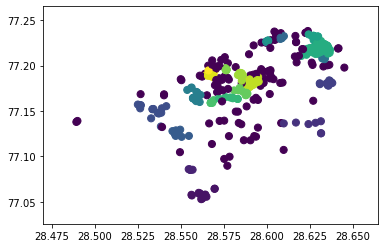

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(gdf.geometry.y, gdf.geometry.x, c=clusters,s=50)
fig.show()

In [16]:
gdf['cluster'] = clusters
gdf

/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,amenity,geometry,cluster
0,node/248852574,cafe,POINT (77.15189 28.53349),4
1,node/248852583,bank,POINT (77.15200 28.53365),4
2,node/266442982,cinema,POINT (77.16449 28.55731),8
3,node/266443204,bank,POINT (77.16455 28.55785),8
4,node/266443228,fast_food,POINT (77.16376 28.55733),8
...,...,...,...,...
963,node/6895185767,blood_bank,POINT (77.11773 28.58659),-1
964,node/6895185773,blood_bank,POINT (77.14185 28.53276),4
965,node/6895185775,blood_bank,POINT (77.20070 28.62648),-1
966,node/6898010185,fast_food,POINT (77.21742 28.63073),12


## Removing Outliers

There are few outliers in our data which cannot be considered into any cluster or as a cluster itself, so these are removed.

In [17]:
gdf = gdf[gdf.cluster != -1]
gdf

,id,amenity,geometry,cluster
0,node/248852574,cafe,POINT (77.15189 28.53349),4
1,node/248852583,bank,POINT (77.15200 28.53365),4
2,node/266442982,cinema,POINT (77.16449 28.55731),8
3,node/266443204,bank,POINT (77.16455 28.55785),8
4,node/266443228,fast_food,POINT (77.16376 28.55733),8
...,...,...,...,...
957,node/6885031739,blood_bank,POINT (77.21737 28.63662),12
958,node/6885031740,blood_bank,POINT (77.21319 28.63542),12
959,node/6888422272,blood_bank,POINT (77.18135 28.59293),18
964,node/6895185773,blood_bank,POINT (77.14185 28.53276),4


/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


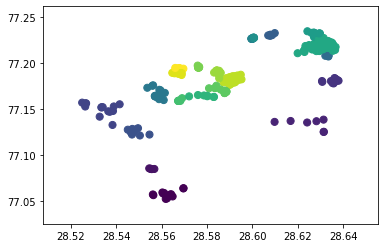

In [18]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(gdf.geometry.y, gdf.geometry.x, c=gdf.cluster,s=50)
fig.show()

In [19]:
city_map = folium.Map([gdf.loc[0].geometry.y, gdf.loc[0].geometry.x], zoom_start=11)

for _, row in gdf.iterrows():
    folium.CircleMarker([row.geometry.y, row.geometry.x],
                        radius=1,
                        popup=row['amenity'],
                       ).add_to(city_map)

city_map

In [20]:
cluster_sizes = gdf['cluster'].value_counts()
cluster_sizes

12    169
8      28
18     21
15     16
4      14
5      12
0      12
16     10
3      10
11     10
19     10
17     10
9       8
14      7
13      7
2       7
6       7
20      6
7       5
1       5
10      5
Name: cluster, dtype: int64

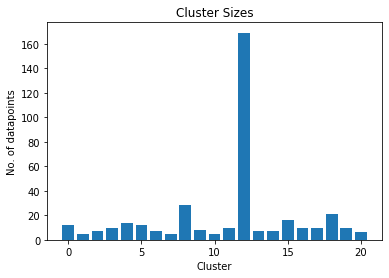

In [21]:
plt.bar(cluster_sizes.index, cluster_sizes)
plt.ylabel('No. of datapoints')
plt.xlabel('Cluster')
plt.title('Cluster Sizes')
plt.show()

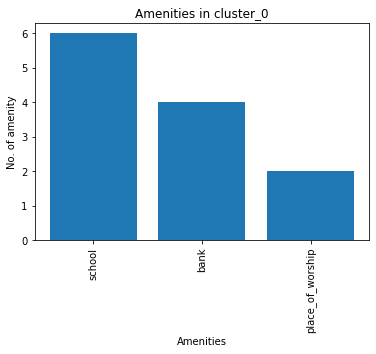

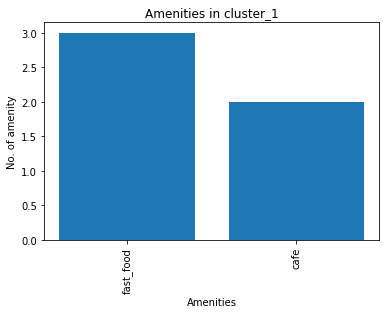

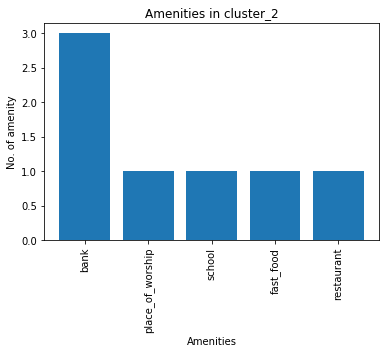

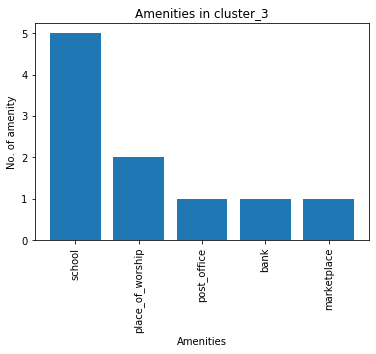

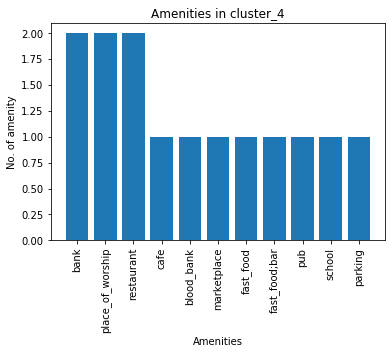

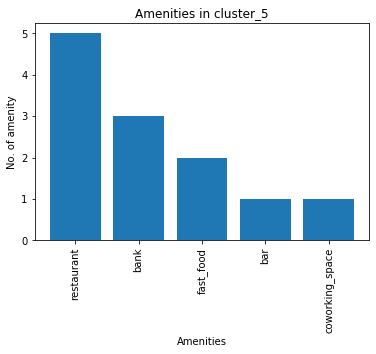

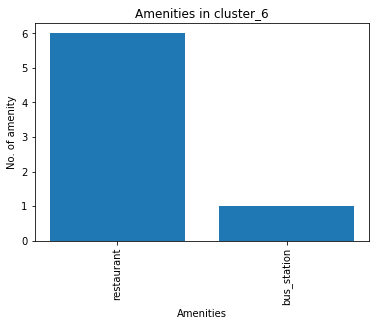

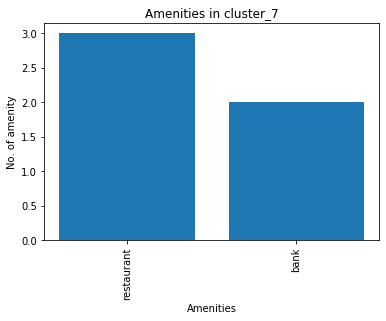

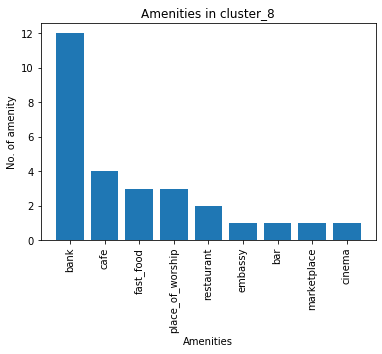

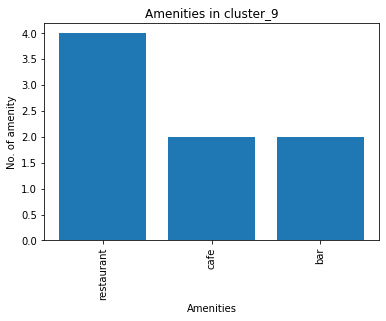

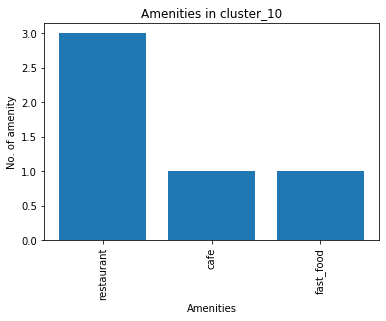

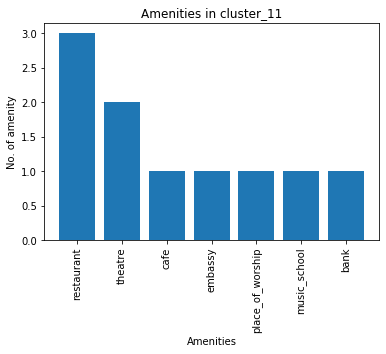

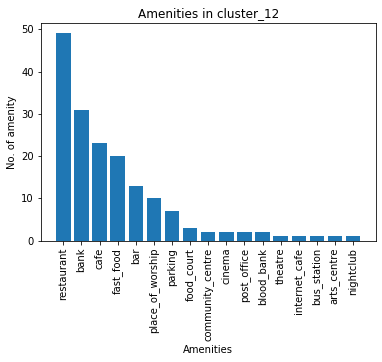

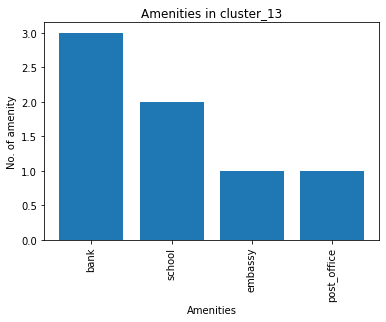

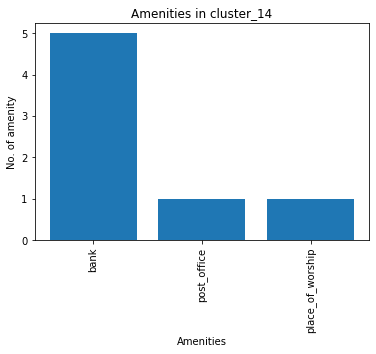

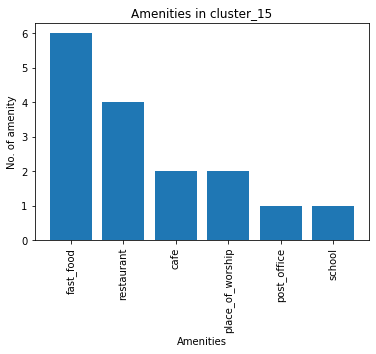

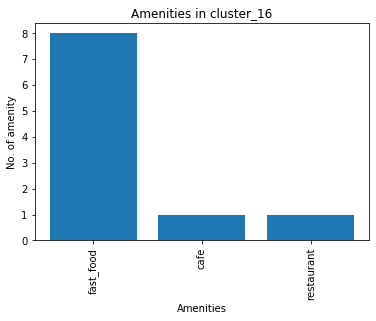

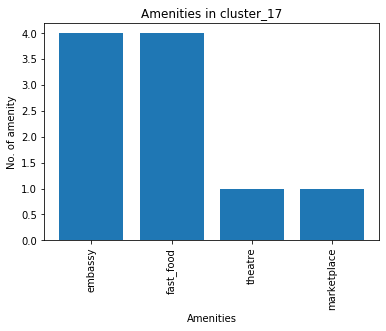

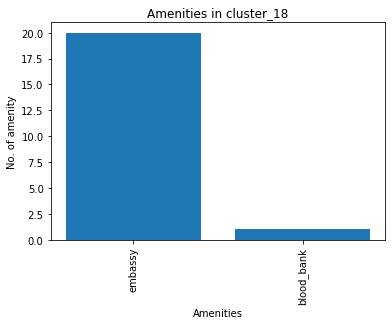

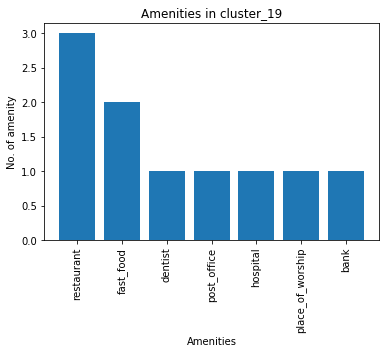

In [22]:
for cluster_no in range(max(gdf.cluster)):
    cluster = gdf[gdf.cluster == cluster_no]
    amenity_count = cluster.amenity.value_counts()
    plt.bar(amenity_count.index, amenity_count)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.ylabel('No. of amenity')
    plt.xlabel('Amenities')
    plt.title(f'Amenities in cluster_{cluster_no}')
    plt.show()

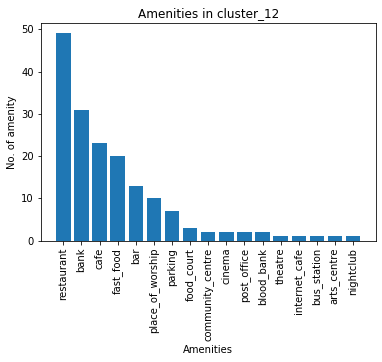

In [23]:
imp_cluster = 12
cluster = cluster = gdf[gdf.cluster == imp_cluster]

amenity_count = cluster.amenity.value_counts()
plt.bar(amenity_count.index, amenity_count)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylabel('No. of amenity')
plt.xlabel('Amenities')
plt.title(f'Amenities in cluster_{imp_cluster}')
plt.show()

## Most Significant Cluster

We can observe that **cluster_12** is the largest cluster with most number of POI datapoints. Also it has the largest varity of amenity making it a significant cluster for any type of commercial activity.

However, for specific commercial activity other cluster may seem more significant. But since we are not given any specific on the commercial activity, we may consider **cluster_12** to be the most significant one.

## Create Convex Hull for each cluster

In [24]:
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon

def create_hull(points):
    points = np.array(list(zip(points.geometry.x, points.geometry.y)))
    hull = ConvexHull(points)
    hull_points = points[hull.vertices,0], points[hull.vertices,1]
    
    return Polygon(zip(points[hull.vertices,0], points[hull.vertices,1]))    

In [25]:
clusters = dict()

for c in gdf.cluster.unique():
    clusters['cluster_' + str(c)] = create_hull(gdf[gdf.cluster == c])
clusters

{'cluster_4': <shapely.geometry.polygon.Polygon at 0x7f427e787e90>,
 'cluster_8': <shapely.geometry.polygon.Polygon at 0x7f427e787d10>,
 'cluster_6': <shapely.geometry.polygon.Polygon at 0x7f427e787690>,
 'cluster_12': <shapely.geometry.polygon.Polygon at 0x7f427e787c10>,
 'cluster_18': <shapely.geometry.polygon.Polygon at 0x7f427e787b90>,
 'cluster_3': <shapely.geometry.polygon.Polygon at 0x7f427e787250>,
 'cluster_20': <shapely.geometry.polygon.Polygon at 0x7f427e7874d0>,
 'cluster_7': <shapely.geometry.polygon.Polygon at 0x7f427e787450>,
 'cluster_9': <shapely.geometry.polygon.Polygon at 0x7f427e7871d0>,
 'cluster_11': <shapely.geometry.polygon.Polygon at 0x7f427e787210>,
 'cluster_15': <shapely.geometry.polygon.Polygon at 0x7f427e787290>,
 'cluster_5': <shapely.geometry.polygon.Polygon at 0x7f427e787ad0>,
 'cluster_19': <shapely.geometry.polygon.Polygon at 0x7f427e787190>,
 'cluster_0': <shapely.geometry.polygon.Polygon at 0x7f427e787790>,
 'cluster_10': <shapely.geometry.polygon.P

In [26]:
crs = {'init': 'epsg:4326'}

polygon = gpd.GeoDataFrame({
    'cluster': list(clusters.keys()),
    'geometry': list(clusters.values())}, crs=crs)
polygon

,cluster,geometry
0,cluster_4,"POLYGON ((77.15527 28.54155, 77.13287 28.53841..."
1,cluster_8,"POLYGON ((77.17316 28.55373, 77.17581 28.55628..."
2,cluster_6,"POLYGON ((77.22956 28.60784, 77.22992 28.60695..."
3,cluster_12,"POLYGON ((77.21319 28.63542, 77.21061 28.61990..."
4,cluster_18,"POLYGON ((77.17618 28.58989, 77.17897 28.58725..."
5,cluster_3,"POLYGON ((77.18047 28.63064, 77.18369 28.63612..."
6,cluster_20,"POLYGON ((77.19385 28.56960, 77.19372 28.56742..."
7,cluster_7,"POLYGON ((77.20843 28.63344, 77.20704 28.63345..."
8,cluster_9,"POLYGON ((77.22639 28.59953, 77.22629 28.59996..."
9,cluster_11,"POLYGON ((77.22804 28.62710, 77.23438 28.62420..."


In [27]:
city_map = folium.Map([gdf.loc[0].geometry.y, gdf.loc[0].geometry.x], zoom_start=11)

for _, row in polygon.iterrows():
    folium.GeoJson(row.geometry,
                        tooltip=row['cluster'].split('_')[1]
                       ).add_to(city_map)

city_map

## Save Commercial clusters into Sharpfile

In [28]:
polygon.to_file(filename='commercial_cluster.geojson', driver='GeoJSON')
polygon.to_file(filename='commercial_cluster.shp', driver="ESRI Shapefile")